(i) discard the “Infant” abalones; (ii) discretize the attribute “Number of rings” into 2 classes; (iii) try at least 3 different classification methods (among those discussed in DM2, including ensemble methods) on the resulting dataset, using the discretized n. of rings as class, and evaluating them with cross-validation.

In [1]:
%matplotlib inline
%pylab inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
import pydotplus 
from IPython.display import Image  
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
#rcParams['figure.figsize'] = 20, 20
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from scipy.stats import randint as sp_randint
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

Populating the interactive namespace from numpy and matplotlib


/Users/ludovicavasile/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("abalone.data.txt", sep=',',names = ['Sex','Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']) 
df.head()
#df.describe()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#df.info()
print(df.mean())

Length      0.523992
Diameter    0.407881
Height      0.139516
Whole       0.828742
Shucked     0.359367
Viscera     0.180594
Shell       0.238831
Rings       9.933684
dtype: float64


In [4]:
# Transform Sex from a string to a number representation
sexes = sorted(df['Sex'].unique())
#print(sexes)
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head()
df = df.drop(['Sex'], axis=1)

In [5]:
df = df[df.Sex_Val != 1]
df["Sex_Val"] = df["Sex_Val"].apply(lambda x: 1 if x == 2 else 0)
df.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_Val
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0


(array([   24.,   461.,  1058.,   850.,   205.,   148.,    67.,    15.,
            4.,     3.]),
 array([  3. ,   5.6,   8.2,  10.8,  13.4,  16. ,  18.6,  21.2,  23.8,
         26.4,  29. ]),
 <a list of 10 Patch objects>)

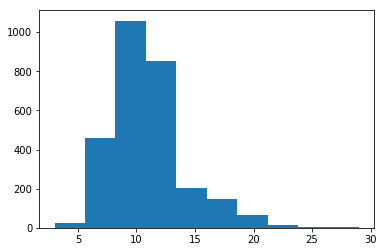

In [6]:
plt.hist(df["Rings"])

In [7]:
#Age
df["Age"] = df["Rings"].apply(lambda x: x+1)
df.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_Val,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,16
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,8
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,10
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,11
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0,21


In [8]:
#BinRings
a = 0
b = 1
dicto={0: 'Low', 1: "High"}
df["Rings"] = df["Rings"].apply(lambda x: a if x < df["Rings"].mean() else b)
df.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_Val,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,1,16
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,1,8
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,0,10
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,1,11
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1,0,21


(array([ 1543.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1292.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

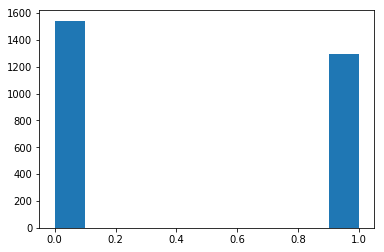

In [9]:
plt.hist(df["Rings"])

In [10]:
## Decision Tree
names = ['Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']
col = ['Length','Diameter','Height','Whole','Shucked','Viscera','Shell']
df = df[names]# rearrange as you like
#df.describe()
df.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1


In [11]:
#df.to_csv('output.csv', index=False )

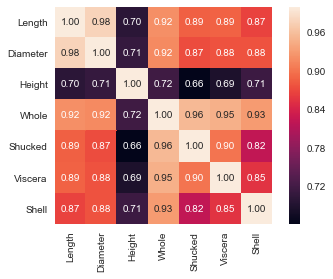

In [12]:
#Convert the DataFrame to a numpy array:
train_data = df.values
train_data
train_features = df.iloc[:,0:7].values
train_target = df.iloc[:, -1].values     
cm = np.corrcoef(df.iloc[:,0:7].values.T)
sns.set(style='whitegrid', context='notebook', font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=col, xticklabels=col)
#I coefficienti di correlazione sono limitati all’intervallo compreso fra -1 e 1. Due caratteristiche hanno una correlazione positiva perfetta se , non
#hanno alcuna correlazione se e hanno una correlazione negativa perfetta se .
#possiamo vedere che tutti le proprietà sono correlate fra di loro con una proprietà chee sta in borderline (height)

In [13]:
train_features[0]

array([ 0.455 ,  0.365 ,  0.095 ,  0.514 ,  0.2245,  0.101 ,  0.15  ])

In [14]:
train_target[0]

1

In [15]:
# Fit the model to our training data
#clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
#                                  min_samples_split=2, min_samples_leaf=2)
#clf = clf.fit(train_features, train_target)

In [16]:
#clf.feature_importances_

In [17]:
#pred_target = clf.predict(train_features)

#print(metrics.precision_score(train_target, pred_target, average='weighted'))
#print(metrics.recall_score(train_target, pred_target, average='weighted'))
#print(metrics.f1_score(train_target, pred_target, average='weighted'))
#print(metrics.accuracy_score(train_target, pred_target))
#print(metrics.precision_recall_fscore_support(train_target, pred_target))

In [18]:
#20/80
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)

In [19]:
print("Test size: {}; Training size: {}".format(len(test_x),len(train_x)))

Test size: 567; Training size: 2268


In [20]:
len(train_x), len(test_x), len(train_x) + len(test_x)

(2268, 567, 2835)

In [21]:
#len(train_y), len(test_y), len(train_y) + len(test_y)

In [22]:
train_x.shape, test_x.shape

((2268, 7), (567, 7))

In [23]:
# Fit the model to our training data
#split con entropy: accuratezza sul test leggermente migliore
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, 
                                  min_samples_split=2, min_samples_leaf=10)
clf = clf.fit(train_x, train_y)

In [24]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [25]:
#Accuratezza_training&test_noCrossValidation
print(metrics.accuracy_score(train_y, train_pred))
print(metrics.accuracy_score(test_y, test_pred))

0.812169312169
0.689594356261


In [26]:
#Albero
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=col,  
                         class_names=[dicto[a], dicto[b]],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
Siamo partiti con 2268 campioni alla radice e abbiamo suddiviso due nodi figli, con 1540 e 728 campioni ciascuno, utilizzando per
la separazione il valore di shell (petal width ≤ 0.339 cm). Dopo la
prima suddivisione, questo procede per una profondità di impostata a 3.


In [27]:
cm = confusion_matrix(test_y, test_pred)
print(cm)

[[234  65]
 [111 157]]


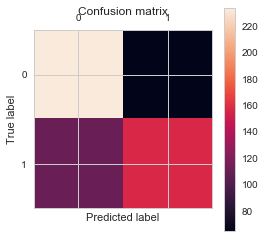

In [28]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=[dicto[a], dicto[b]]))

             precision    recall  f1-score   support

        Low       0.68      0.78      0.73       299
       High       0.71      0.59      0.64       268

avg / total       0.69      0.69      0.69       567



In [30]:
# cross validation_DecisionTree
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.08)


In [31]:
#roc_DecisionTree
y_score1 = clf.predict_proba(test_x)
fpr1, tpr1, _ =  roc_curve(test_y, y_score1[:,1])
print auc(fpr1, tpr1)

0.762423251635


In [32]:
##Random Forest

clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini',
                             max_features=None,
                             max_depth=10, 
                             min_samples_split=2,
                             min_samples_leaf=5,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced

In [33]:
#cross validation_RandomForest
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.72 (+/- 0.09)


In [34]:
clf.base_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [36]:
clf = RandomForestClassifier(n_estimators=20)

In [37]:
param_dist = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "max_features": sp_randint(1, len(train_x[0]) + 1),
              "min_samples_split": sp_randint(10, 51),
              "min_samples_leaf": sp_randint(10, 51),
              "bootstrap": [True],
              "criterion": ["entropy", "gini"],
              "class_weight":['balanced', None, {0: 0.3, 1: 0.7}]}

n_iter_search = 100
search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))

In [38]:
search.fit(train_features, train_target)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=10,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a19f7db10>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1a0ee990>, 'criterion': ['entropy', 'gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1ab08d50>, 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None], 'class_weight': ['balanced', None, {0: 

In [39]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.731 (std: 0.016)
Parameters: {'bootstrap': True, 'min_samples_leaf': 26, 'min_samples_split': 20, 'criterion': 'entropy', 'max_features': 4, 'max_depth': 8, 'class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.730 (std: 0.022)
Parameters: {'bootstrap': True, 'min_samples_leaf': 13, 'min_samples_split': 49, 'criterion': 'entropy', 'max_features': 5, 'max_depth': 9, 'class_weight': None}

Model with rank: 3
Mean validation score: 0.729 (std: 0.014)
Parameters: {'bootstrap': True, 'min_samples_leaf': 16, 'min_samples_split': 28, 'criterion': 'entropy', 'max_features': 2, 'max_depth': 9, 'class_weight': None}



In [40]:
#cross validation_(RandomizedSearch)
scores = cross_validation.cross_val_score(search.best_estimator_.estimators_[0], train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.71 (+/- 0.09)


In [41]:
param_grid = {"max_depth": [2,3,4,5,6]}
search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))

In [42]:
search.fit(train_features, train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [43]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.720 (std: 0.006)
Parameters: {'max_depth': 6}

Model with rank: 2
Mean validation score: 0.708 (std: 0.019)
Parameters: {'max_depth': 5}

Model with rank: 3
Mean validation score: 0.691 (std: 0.035)
Parameters: {'max_depth': 4}



In [44]:
#cross validation_RandomForest(GridSearch)
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.70 (+/- 0.07)


In [45]:
search.best_estimator_.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1006482192, splitter='best')

In [46]:
#cross validation_bestEstimator
scores = cross_validation.cross_val_score(search.best_estimator_.estimators_[0], train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.67 (+/- 0.09)


In [47]:
#roc_bestEstimator
search.best_estimator_.estimators_[0]
y_score7 = search.best_estimator_.estimators_[0].predict_proba(test_x)
fpr7, tpr7, _ =  roc_curve(test_y, y_score7[:,1])
print(auc(fpr7, tpr7))

0.804322867269


In [48]:
#Albero
dot_data = tree.export_graphviz(search.best_estimator_.estimators_[0], out_file=None, 
                         feature_names=col,  
                         class_names=[dicto[a], dicto[b]],  
                         filled=True, rounded=True,  
                         special_characters=True,
                               max_depth=5)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [49]:
## k-NN

n_neighbors = 13
weights = 'uniform'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)


In [50]:
nn = clf.fit(train_x, train_y)
nn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [51]:
print "error: ", sum(abs(np.array(clf.predict(train_x)) - np.array(train_y)))

error:  551


In [52]:
#cross validation_Knn
scores = cross_validation.cross_val_score(nn, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.71 (+/- 0.05)


In [53]:
#roc_Knn
y_score5 = nn.predict_proba(test_x)
fpr5, tpr5, _ =  roc_curve(test_y, y_score5[:,1])
print(auc(fpr5, tpr5))

0.824146408426


In [54]:
##Knn_vettori_normalizzati

train_features_norm = (train_x - train_x.mean(axis=0))/ train_x.std(axis=0)

In [55]:
nn_norm = clf.fit(train_features_norm, train_y)

In [56]:
for i in range(10):
    p = clf.predict(train_features_norm[i].reshape(1, -1))
    print i, ":", train_features_norm[i], "predicted: ", p[0], " real: ", train_y[i]

0 : [-0.14702819  0.05104113  0.65782465 -0.30553742 -0.51443705 -0.19572365
  0.11338834] predicted:  1  real:  0
1 : [ 0.11332466 -0.01225099 -0.58857995 -0.43826358 -0.27863465 -0.29872722
 -0.54611788] predicted:  0  real:  0
2 : [-0.9801573  -0.70846427 -1.05598167 -1.0653947  -1.05206654 -1.04427687
 -0.93406271] predicted:  0  real:  0
3 : [ 1.05059491  0.87383865  0.3462235   0.35698734  0.4216985   0.61849504
  0.1987362 ] predicted:  0  real:  1
4 : [ 1.4150889   1.31688347  1.74842867  0.94319455  1.03006872  1.01579452
  1.33153511] predicted:  1  real:  1
5 : [-0.04288705  0.11433325  0.65782465  0.00194486 -0.44605436 -0.14667433
  0.46253869] predicted:  1  real:  1
6 : [ 0.37367751  0.43079383  0.65782465  0.34592683  0.21183436  0.08385747
  0.50909207] predicted:  0  real:  0
7 : [ 0.42574808  0.55737807  0.19042292  0.29615451  0.75653792  0.23591035
 -0.19696753] predicted:  0  real:  0
8 : [-0.92808673 -0.89834063 -1.21178224 -0.7424277  -0.54744939 -1.13256564
 -0

In [57]:
print "error: ", sum(abs(np.array(clf.predict(train_features_norm)) - np.array(train_y)))

error:  586


In [58]:
#cross validation_Knn_norm
scores = cross_validation.cross_val_score(nn_norm, train_features, train_target, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.05)


In [59]:
#roc_Knn_norm
y_score15 = nn_norm.predict_proba(test_x)
fpr15, tpr15, _ =  roc_curve(test_y, y_score15[:,1])
print(auc(fpr15, tpr15))

0.730993860131


In [60]:
## Neural Networks

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=1)
neu_net = clf.fit(train_x, train_y)
neu_net
#neu_net = clf.fit(train_features, train_target) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [61]:
print "error: ", sum(abs(np.array(clf.predict(train_x)) - np.array(train_y)))

error:  597


In [62]:
# weights of the network
clf.coefs_

[array([[ 0.36331922,  0.1539306 ,  0.16401236, -0.23349731, -0.41971179,
         -0.48436843, -0.96857304, -0.2897841 , -0.2676374 , -0.26575494],
        [-0.97654704,  0.13319097,  0.63304769,  1.08648037, -0.56154085,
          0.20254329, -0.67985878, -0.01509159, -0.53632514, -0.60355649],
        [-1.21027528,  0.52475298, -0.38525765,  1.10162944,  0.44721188,
          0.46885727, -0.89281277, -0.57833425, -0.43058421,  0.25971115],
        [-0.70049893, -0.36737172, -0.69908369,  0.98246917,  0.2279814 ,
         -0.21919761, -1.75505485,  0.07390984, -0.65000201, -0.75969958],
        [ 3.43278291,  0.18563812,  3.83912149, -1.47236902, -0.47143241,
         -0.06191101,  0.55718168, -0.37741037, -0.2831619 , -0.43249724],
        [ 0.25414081,  0.15406153,  0.05122434, -0.42424469, -0.01001247,
         -0.53067836, -0.23313377, -0.48208679,  0.08885235,  0.02304623],
        [-1.60200653, -0.18650009, -1.60455174,  1.1441801 , -0.53472891,
          0.0426508 , -1.1196023

In [63]:
#cross validation_NeuralNetwork
scores = cross_validation.cross_val_score(neu_net, train_features, train_target, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.08)


In [64]:
#roc_NeuralNetwork
y_score6 = neu_net.predict_proba(test_x)
fpr6, tpr6, _ =  roc_curve(test_y, y_score6[:,1])
print(auc(fpr6, tpr6))

0.835658663206


In [65]:
# Bagging

from sklearn.ensemble import BaggingClassifier

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, 
                                  min_samples_split=2, min_samples_leaf=3)
# max_sample = 100% + Bootstrap ==> ~62% of original dataset used as sample
bag = BaggingClassifier(clf, n_estimators=100, max_samples=1.0, bootstrap=True)
bag = bag.fit(train_x, train_y)

y_score8 = bag.predict_proba(test_x)
fpr8, tpr8, _ =  roc_curve(test_y, y_score8[:,1])
print "Bagging:", auc(fpr8, tpr8)

clf = clf.fit(train_x, train_y)
y_score9 = clf.predict_proba(test_x)
fpr9, tpr9, _ =  roc_curve(test_y, y_score9[:,1])
print "Single DT:", auc(fpr9, tpr9)

Bagging: 0.827309938601
Single DT: 0.734338341736


In [66]:
#cross validation_Bagging
scores = cross_validation.cross_val_score(bag, train_features, train_target, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.08)


(array([  4.,   9.,   5.,  11.,  18.,  16.,  14.,  13.,   5.,   5.]),
 array([ 0.79699121,  0.79940473,  0.80181825,  0.80423177,  0.80664529,
         0.8090588 ,  0.81147232,  0.81388584,  0.81629936,  0.81871287,
         0.82112639]),
 <a list of 10 Patch objects>)

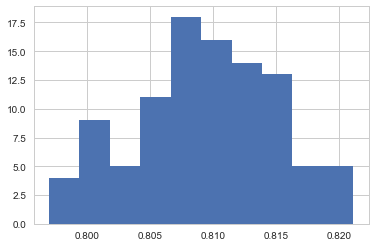

In [67]:
# Bagging / 2

from sklearn.ensemble import BaggingClassifier

results = []
for nnn in range(100):
    clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=3)
    # max_sample = 100% + Bootstrap ==> ~62% of original dataset used as sample
    bag = BaggingClassifier(clf, n_estimators=20, max_samples=1.0, bootstrap=True)
    bag = bag.fit(train_x, train_y)

    y_score = bag.predict_proba(test_x)
    fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
    # print auc(fpr, tpr)
    results.append(auc(fpr, tpr))
plt.hist(results)

In [68]:
#cross validation_Bagging(2)
scores = cross_validation.cross_val_score(bag, train_features, train_target, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.07)


In [69]:
## Boosting with AdaBoost

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=20)
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=100)
ada = ada.fit(train_x, train_y)

In [70]:
#cross validation_AdaBoost
scores = cross_validation.cross_val_score(ada, train_features, train_target, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.04)


In [71]:
#roc_AdaBoost
y_score4 = ada.predict_proba(test_x)
fpr4, tpr4, _ =  roc_curve(test_y, y_score[:,1])
print(auc(fpr4, tpr4))

0.797265761494


In [72]:
#PLOT ROC CURVES

from sklearn.metrics import roc_curve, auc
##Bagging(2)
#fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
#roc_auc = auc(fpr, tpr)
#DecisionTree
fpr1, tpr1, _ =  roc_curve(test_y, y_score1[:,1])
roc_auc1 = auc(fpr1, tpr1)
##AdaBoost
#fpr4, tpr4, _ =  roc_curve(test_y, y_score4[:,1])
#roc_auc4 = auc(fpr4, tpr4)
#Knn
fpr5, tpr5, _ =  roc_curve(test_y, y_score5[:,1])
roc_auc5 = auc(fpr5, tpr5)
#NeuralNet
fpr6, tpr6, _ =  roc_curve(test_y, y_score6[:,1])
roc_auc6 = auc(fpr6, tpr6)
##RandomForest
#fpr7, tpr7, _ =  roc_curve(test_y, y_score7[:,1])
#roc_auc7 = auc(fpr7, tpr7)
#Bagging
fpr8, tpr8, _ =  roc_curve(test_y, y_score8[:,1])
roc_auc8 = auc(fpr8, tpr8)


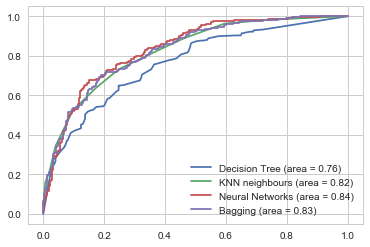

In [73]:
#plt.plot(fpr,tpr, label='Bagging(2) (area = %0.2f)' % roc_auc)
plt.plot(fpr1,tpr1, label='Decision Tree (area = %0.2f)' % roc_auc1)
#plt.plot(fpr4,tpr4, label='ADAboost (area = %0.2f)' % roc_auc4)
plt.plot(fpr5,tpr5, label='KNN neighbours (area = %0.2f)' % roc_auc5)
plt.plot(fpr6,tpr6, label='Neural Networks (area = %0.2f)' % roc_auc6)
#plt.plot(fpr7,tpr7, label='Random Forest (area = %0.2f)' % roc_auc7)
plt.plot(fpr8,tpr8, label='Bagging (area = %0.2f)' % roc_auc8)

plt.legend(loc="lower right")
plt.show()

[]

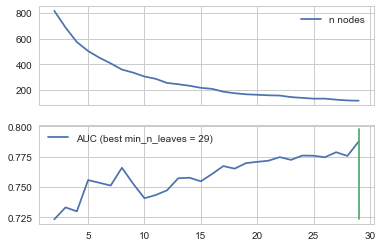

In [74]:
#FITTING GRAPH

roc_auc_i = []
value_list = range(2,30)
n_nodes = []

# Fitting Graph  -- with ROC AUC as performance measure
for i in value_list:
    clf_i = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=  i  )
    clf_i = clf_i.fit(train_x, train_y)
    y_score_i = clf_i.predict_proba(test_x)
    fpr_i, tpr_i, _ =  roc_curve(test_y, y_score_i[:,1])
    roc_auc_i.append(auc(fpr_i, tpr_i))
    n_nodes.append(clf_i.tree_.node_count)

best_value = value_list[np.argmax(roc_auc_i)]
best_roc = np.max(roc_auc_i)
worst_roc = np.min(roc_auc_i)

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(value_list, n_nodes, label="n nodes")
axarr[0].legend(loc="upper right")
axarr[1].plot(value_list, roc_auc_i, label="AUC (best min_n_leaves = %s)" % best_value)
axarr[1].plot([best_value, best_value], [worst_roc, best_roc + 0.01])
axarr[1].legend(loc="best")
plt.plot()